In [156]:
import matplotlib.pyplot as plt
import numpy as np


def write_signal_file(file_path, signal):
    signal.astype(np.uint16).tofile(file_path, sep='\n')

In [157]:
# Constants: 
FILE_PREFIX = 'ts_'
FILE_SUFFIX = '.dat'
SAMPLING_FREQUENCY = 22 * 1_000 # 10 kHz
NUM_SAMPLES = SAMPLING_FREQUENCY # 1 second
MIN_INTENSITY = 0 # 0 intensity
MAX_INTENSITY = 65535 # 1 intensity

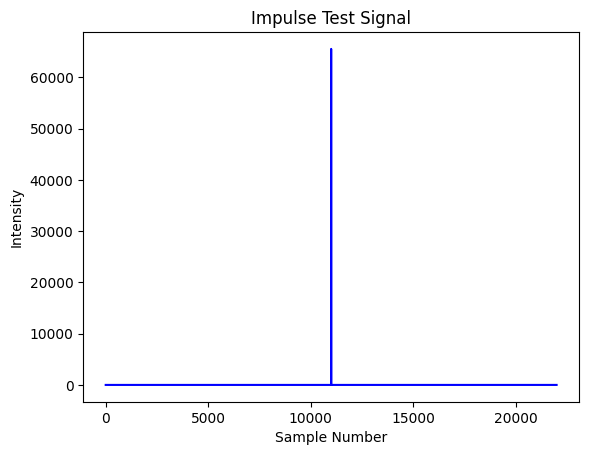

In [158]:
# Create the Impulse test signal:
IMPLUSE_POSITION = 0.5 * NUM_SAMPLES # Halfway through the samples
IMPLUSE_POSITION = np.clip(int(IMPLUSE_POSITION), 0, NUM_SAMPLES-1) # Ensure the impulse position is within the bounds of the samples.

# Impulse test signal consists of a single sample at max intensity occurring at the midpoint of the samples.

impulse_samples = np.zeros(NUM_SAMPLES, dtype=np.uint16)
impulse_samples[::1] = MIN_INTENSITY
impulse_samples[IMPLUSE_POSITION] = MAX_INTENSITY

# Plot the Impulse test signal.
plt.plot(impulse_samples, 'b-')
plt.title('Impulse Test Signal')
plt.xlabel('Sample Number')
plt.ylabel('Intensity')
plt.show()

# Write the Impulse test signal to a file.
write_signal_file(FILE_PREFIX + 'impulse' + FILE_SUFFIX, impulse_samples)


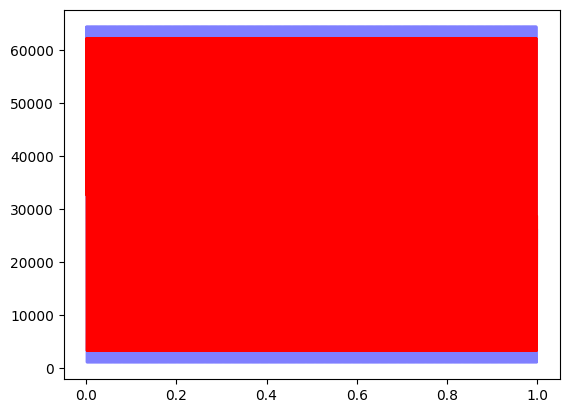

In [159]:
# Create the Sine test signal:
CARRIER_FREQUENCY = 500 # 500Hz
CARRIER_AMPLITUDE = 0.9 # 50% of the max intensity
NOISE_FREQUENCY = 3_000 # 3kHz
NOISE_AMPLITUDE = 0.1 # 10% of the max intensity

# Sine test signal consists of a carrier signal with noise added.
time_points = np.linspace(0, 1, NUM_SAMPLES, endpoint=False)
carrier_samples = CARRIER_AMPLITUDE * MAX_INTENSITY/2 * np.sin(2 * np.pi * CARRIER_FREQUENCY * time_points)
noise_samples = NOISE_AMPLITUDE * MAX_INTENSITY/2 * np.sin(2 * np.pi * NOISE_FREQUENCY * time_points) 

result_samples = carrier_samples + noise_samples
result_samples = np.add(result_samples, MAX_INTENSITY/2) # Shift the signal up by half the max intensity to get the signal in the range [0, MAX_INTENSITY]

# Scale the signal to the range [MIN_INTENSITY, MAX_INTENSITY]
result_samples = np.divide(result_samples, MAX_INTENSITY) * (MAX_INTENSITY - MIN_INTENSITY) + MIN_INTENSITY
# print(np.min(result_samples))
# print(np.max(result_samples))

# Plot the Sine test signal.
plt.plot(time_points, result_samples, 'b', alpha=0.5)
plt.plot(time_points, np.add(carrier_samples, MAX_INTENSITY/2), 'r')

# Write the Sine test signal to a file.
write_signal_file(FILE_PREFIX + 'sine' + FILE_SUFFIX, result_samples.astype(np.uint16))